In [ ]:
import pickle

#unpicked the file
with open(r'/content/images.p',"rb") as f:
    images = pickle.load(f)

with open(r'/content/labels.p',"rb") as f:
    labels = pickle.load(f)

In [ ]:
print(images.shape)
print(labels.shape)


(1517, 100, 100)
(1517,)


In [ ]:
set(labels)

{np.str_('rose'), np.str_('sunflower')}

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
set(labels)

{np.int64(0), np.int64(1)}

In [ ]:
import numpy as np
n_persons = len(set(labels))
print("Number of persons:" , n_persons)
label_mapping = le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
  print(i,":",label_mapping[i])

Number of persons: 2
0 : rose
1 : sunflower


In [ ]:
import cv2
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img=img.reshape(100,100,1)
  img = img/255
  return img

In [ ]:
images = np.array(list(map(preprocessing, images)))
print("Shape of Input:", images.shape)

Shape of Input: (1517, 100, 100, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels)
categories = labels.shape[1]
print(categories)

2


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Conv2D(128,(5,5),activation='relu',input_shape=(100,100,1)))
model.add(Conv2D(128,(5,5),activation='relu'))
model.add(Conv2D(256,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))

model.add(Dense(2,activation='softmax'))
model.compile(Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 92, 92, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 88, 88, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 29, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 32)     │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,365,634 (9.02 MB)

 Trainable params: 2,365,634 (9.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
h=model.fit(images,labels,epochs=20,batch_size=20,validation_split=0.2,verbose=1)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 48s 462ms/step - accuracy: 0.6501 - loss: 0.6463 - val_accuracy: 0.3355 - val_loss: 0.7461
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.6690 - loss: 0.6078 - val_accuracy: 0.3026 - val_loss: 0.8402
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.6792 - loss: 0.6051 - val_accuracy: 0.2401 - val_loss: 1.0725
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.7244 - loss: 0.5442 - val_accuracy: 0.4638 - val_loss: 0.8830
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.7138 - loss: 0.5408 - val_accuracy: 0.4145 - val_loss: 0.9672
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.7516 - loss: 0.5076 - val_accuracy: 0.3947 - val_loss: 1.0347
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.7835 - loss: 0.4585 - val_accuracy: 0.4507 - val_loss: 1.1030
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.8111 - loss: 0.4388 - val_accurac

In [ ]:
from google.colab import files
upload=files.upload()

Saving garden-rose-red-pink-56866.jpeg to garden-rose-red-pink-56866.jpeg


In [ ]:
d=list(upload.keys())[0]
print(d)

garden-rose-red-pink-56866.jpeg


[255 216 255 ...  39 255 217]


/tmp/ipython-input-18-483556415.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


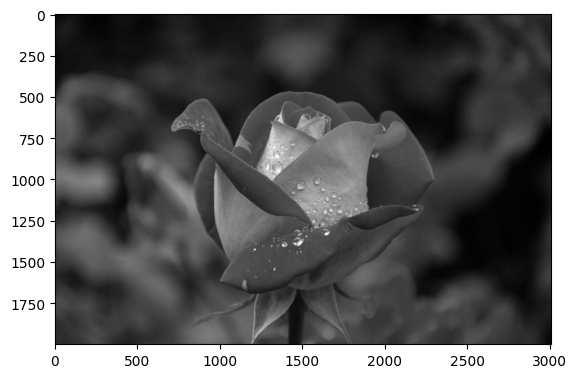

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_UNCHANGED)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [ ]:
img=np.asarray(img)
img=cv2.resize(img,(100,100))
img=preprocessing(img)
img=img.reshape(1,100,100,1)
prediction=model.predict(img)

In [ ]:
p=np.argmax(prediction)
print(p)

In [ ]:
model.save("flower_detection_model")